<a href="https://colab.research.google.com/github/setthawut8/ai/blob/main/%5BWELayer_%2B_CNN_CNN%2BLSTM%5D_Banking_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data and Library Installation

In [1]:
#download data
!gdown --id 1-avUDygRCGvAiPplmc6MundS_PpnohRv
!gdown --id 106OVRPIQQBppganRnCZigxQh6-Zyvqit

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-avUDygRCGvAiPplmc6MundS_PpnohRv
To: /content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx
100% 3.87M/3.87M [00:00<00:00, 282MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=106OVRPIQQBppganRnCZigxQh6-Zyvqit
To: /content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx
100% 141k/141k [00:00<00:00, 69.1MB/s]


In [2]:
#libraby 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_excel('/content/preprocessed_v1_socialfsi_single_train_sampling12150_20220701.xlsx')
test = pd.read_excel('/content/preprocessed_v1_socialfsi_single_test_sampling389_20220701.xlsx')

In [4]:
train.head(5)

,Unnamed: 0,TagFile_Path,TagFile,SV_CustomerName,Main keyword,Channel,SubChannel,lfdn,verbatim_id,sentence_id,Text_original,Text,Human_Category,Human_CategoryID,Human_Sentiment,Human_SentimentID,Text_ws_local
0,0,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1400_2022...,Krungthai_NEXT,"mobile banking+กสิกร,mobile banking+ธนาคารกสิก...",SocialMedia,forum,pantip.com_topic_41249919,Q2207_1549,Q2207_1549_1,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,สอบถามเรื่องการอายัดบัตรเดบิตของกสิกรค่ะ พอดีว...,"Product and Service, Usage and Condition",8,neutral,o,สอบถาม|เรื่อง|การ|อายัด|บัตรเดบิต|ของ|kbank|ค่...
1,1,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainDataV4_RetagCLS-12_Sampling53_P...,NaN,NaN,SocialMedia,Twitter,5fffc6bcb08b583a24679d59,Q202106_5805,Q202106_5805_1,ปกติจะไม่ชอบlog in ใดๆในคอมคนอื่นหรือสำนักงานใ...,ปกติจะไม่ชอบlog in ใดๆในคอมคนอื่นหรือสำนักงานใ...,Security,12,neutral,o,ปกติ|จะ|ไม่ชอบ| |log| |in| |ใดๆ| |ใน|ค|อม|คนอื...
2,2,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling2244_2022...,SocialFSI_ZE-KTB-Feb-Apr2022_Sampling1200_2022...,Krungthai_NEXT,krungthai,SocialMedia,facebook,10161808181448916_1330115550790924,Q2207_636,Q2207_636_1,Krungthai Care ณ. ตอนนี้ยอดก็ยังไม่เข้าค่ะ ถ้า...,Krungthai Care ณ. ตอนนี้ยอดก็ยังไม่เข้าค่ะ ถ้า...,"Product and Service, System",7,negative,n,ktb| |care| |ณ|.| |ตอนนี้|ยอด|ก็|ยัง|ไม่|เข้า|...
3,3,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainSCB-SocialFilterV2_Sampling2750...,NaN,NaN,SocialMedia,Twitter,27634345,Q202106_961,Q202106_961_1,@scb_thailand เรียน scb ขอเบอร?ตืดต่อเพราะคุย ...,@scb_thailand เรียน scb ขอเบอร?ตืดต่อเพราะคุย ...,Staff Quality,4,negative,n,scb_thailand| |เรียน| |scb| |ขอ|เบอร| |ตืด|ต่อ...
4,4,SocialFSI_v4_0_mutiple_train_sampling8203_2021...,SocialFSI_TrainSCB-SocialFilterV2_Sampling2750...,NaN,NaN,SocialMedia,Twitter,28297653,Q202106_2021,Q202106_2021_1,ไอเลิ้บ TMB All Free มาก แต่ช่วยพัฒนาแอพให้สเถ...,ไอเลิ้บ TMB All Free มาก,"Product and Service, Usage and Condition",8,positive,p,ไอ|เลิ้บ| |tmb_all_free| |มาก|


In [5]:
train['Human_CategoryID'].sort_index(ascending=True).value_counts()

7     3275
8     2454
13    2133
5     1163
6     1109
4      522
10     379
3      377
11     232
1      185
9      153
12     152
2       16
Name: Human_CategoryID, dtype: int64

#Create a Vocabulary

In [6]:
from collections import Counter

vocab = Counter()
def data_to_vocab(df):
  for verbatim in df['Text_ws_local']:
    tokens = verbatim.split()
    tokens = [word for word in tokens if len(tokens) > 1]
    vocab.update(tokens)

data_to_vocab(train)

print(len(vocab))
vocab.most_common(20)

54928


[('|scb|', 1811),
 ('|friendtag|', 902),
 ('|2|', 536),
 ('|kbank|', 462),
 ('scb|', 372),
 ('|บาท|', 368),
 ('|1|', 355),
 ('|3|', 348),
 ('|5|', 315),
 ('atm|', 301),
 ('|call_center|', 294),
 ('|tmb|', 291),
 ('scb_thailand|', 287),
 ('|atm|', 283),
 ('|scb_easy|', 226),
 ('|telephonetag|', 224),
 ('|กรุงไทย|', 218),
 ('ktb|', 213),
 ('|app|', 213),
 ('|care|', 206)]

In [7]:
min_occurence = 2
tokens = [k for k, c in vocab.items() if c >= min_occurence]

In [8]:
def save_list(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()
  
save_list(tokens, 'vocab.txt')

#Train Embedding Layer

In [9]:
#Load the vocab as above
def load_doc(filename):
  file = open(filename, 'r')
  text = file.read()
  file.close()
  return text

vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

print(vocab)

{'|เดือน|แล้ว|ค่ะ|', '|asia|', '|12|', '|คือ|อยู่|ๆ|', '|ได้|ค่ะ', '|aia|', '25|', '|ด|', '|มาถึง|', '|ไม่สามารถ|ทำ|รายการ|ได้|ในขณะนี้|', 'เติมเงิน|ผ่าน|แอป|', '|บริษัท|', '|รอคิว|นานมาก|', 'อยู่|ๆ|', '|แต่|นานมาก|', 'คือว่า|ผม|สั่งซื้อ|', 'มี|เบอร์|', '|อยู่แล้ว|', '|c|', '|มัน|มี|', '|travel|', '|ทั้งที่|กดเงิน|แล้ว|ไม่|ออก|', '|ให้|', '|ตลาดนัด|', '|ย|', '|หลัง|วัน|ที่', '|passbook|', '18|', '|bualuang_m_banking|', '|แล้ว|เรา|ลงทะเบียน|ไป|วัน|ที่', '|95|', '5|', 'ขอบคุณ|มาก|ครับ|', '|ทำไง|ดี|', 'ลงทะเบียน|', 'โอนเงิน|จาก|แอป|', '|ยกเว้น|ของ|scb|', '|แต่|แอป|', '|ไม่มี|พนักงาน|รับสาย|', '|kbank_live', '|10.2|', '|พอ|กลับมา|ที่|', '|อีก|ประมาณ|', '|650|', '|x|', '|ตอนนี้|เงินเดือน|', '|5000.|-|', '|บาง|ธนาคาร|ต้อง|ใช้|', '|retention|', '|scbb|', 'สอบถาม|ค่ะ|', '|ใช่|', '|ดอกเบี้ย|ใน|เอกสาร|ใบแจ้งหนี้|', '|อิ|เหี้ย|', '|โมง|เช้า|', '|หุ้น|', '|kbanklive|', '|website|', '10|263|', '|คล้ายๆ|', '|ของ|เรา|', '|ค่ะ|.|', '|ไม่มีเงิน|แล้ว|', '|mbanking|', '20|', '|หลักๆ|', '|ล่ม|หรือเปล่า|คร

In [10]:
#Turn Series into lists
train_docs = train['Text_ws_local'].tolist()
test_docs = test['Text_ws_local'].tolist()

In [11]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
#one hot-enconding for the text like > https://stackoverflow.com/questions/69026891/what-is-keras-tokenizer-fit-on-texts-doing
tokenizer.fit_on_texts(train_docs)
encoded_docs = tokenizer.texts_to_sequences(train_docs)

In [12]:
#Find the most max lengths of word in verbatims from both train and test
max_length_train = max([len(s.split()) for s in train_docs])
max_length_test  = max([len(s.split()) for s in test_docs])
max_length = max([max_length_train, max_length_test])

#Padding in order to equalize some verbatims that do not contain the same length of the max length verbatim
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
#define the labels
ytrain = np.array(train['Human_CategoryID'].tolist())

In [13]:
#Do the same for the test set
encoded_docs_test = tokenizer.texts_to_sequences(test_docs)

Xtest = pad_sequences(encoded_docs_test, maxlen=max_length)
ytest = np.array(test['Human_CategoryID'].tolist())

In [14]:
#Count unique classes
print(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())

13 12


In [15]:
#Count unique classes
num_classes = max(train['Human_CategoryID'].nunique(), test['Human_CategoryID'].nunique())
print(num_classes)

13


In [16]:
from tensorflow.keras.utils import to_categorical

#Multi class problems need one-hot encoding on y
#why - 1 on ytrain and ytest? can follow the linke below
#https://stackoverflow.com/questions/56204731/the-method-np-utils-to-categorical-give-me-an-error/59002957#59002957
ytrain =  to_categorical(ytrain-1, num_classes=num_classes)
ytest = to_categorical(ytest-1, num_classes=num_classes)

In [17]:
vocab_size = len(tokenizer.word_index)+1

#Model CNN

In [18]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [19]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 50, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 50)            630450    
                                                                 
 conv1d (Conv1D)             (None, 64, 32)            4832      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 32, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [21]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=64, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
152/152 [==============================] - 14s 8ms/step - loss: 1.9117 - acc: 0.3485 - val_loss: 1.5962 - val_acc: 0.4650
Epoch 2/10
152/152 [==============================] - 1s 5ms/step - loss: 1.4189 - acc: 0.5454 - val_loss: 1.3563 - val_acc: 0.5514
Epoch 3/10
152/152 [==============================] - 1s 4ms/step - loss: 1.0485 - acc: 0.6770 - val_loss: 1.3097 - val_acc: 0.5802
Epoch 4/10
152/152 [==============================] - 1s 5ms/step - loss: 0.7574 - acc: 0.7643 - val_loss: 1.3977 - val_acc: 0.5984


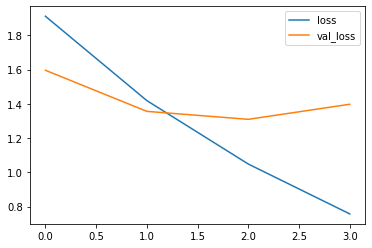

In [22]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

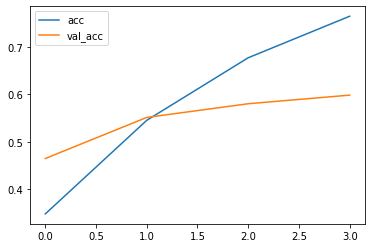

In [23]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [24]:
print(Xtest.shape, ytest.shape)

(389, 66) (389, 13)


In [25]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 4ms/step - loss: 2.2245 - acc: 0.2442
Test Accuracy: 24.421594


#Model CNN + LSTM

In [26]:
from keras.layers import Dense, Flatten, Embedding, BatchNormalization, Dropout, LSTM, Bidirectional
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [27]:
#Define our model
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length, trainable=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 66, 100)           1260900   
                                                                 
 conv1d_1 (Conv1D)           (None, 64, 32)            9632      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 32, 32)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 32, 50)            16600     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               819712    
                                                      

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

#put early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, mode='min')

#Your choices of activation='softmax' in the last layer and compile choice of loss='categorical_crossentropy' 
#are good for a model to predict multiple mutually-exclusive classes.

model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['acc'],)

In [29]:
#Try classweight from this https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

history = model.fit(Xtrain, ytrain, 
                    epochs=10, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
304/304 [==============================] - 5s 8ms/step - loss: 1.6842 - acc: 0.4423 - val_loss: 1.3680 - val_acc: 0.5580
Epoch 2/10
304/304 [==============================] - 2s 6ms/step - loss: 1.1278 - acc: 0.6432 - val_loss: 1.3071 - val_acc: 0.5914
Epoch 3/10
304/304 [==============================] - 2s 6ms/step - loss: 0.7324 - acc: 0.7607 - val_loss: 1.3789 - val_acc: 0.5889


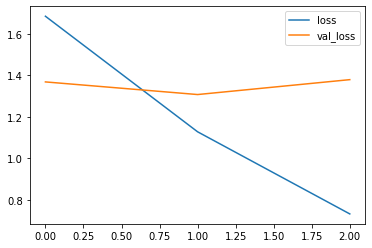

In [30]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()

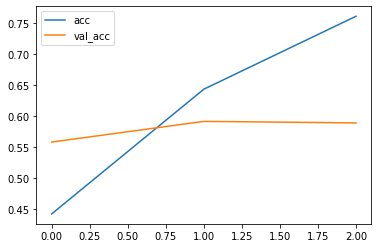

In [31]:
history_frame.loc[:, ['acc', 'val_acc']].plot()

In [32]:
print(ytrain.shape, ytest.shape)

(12150, 13) (389, 13)


In [33]:
loss, acc = model.evaluate(Xtest, ytest)
print('Test Accuracy: %f' % (acc*100))

13/13 [==============================] - 0s 7ms/step - loss: 2.2705 - acc: 0.3213
Test Accuracy: 32.133675
